In [48]:
from utils import *
import time
import seaborn as sns
from config import *

In [24]:
dimension_times=[]
for dimension in [3,5,10,20]:
    df = pd.read_csv(f'algorithm_run_data/DE_dim_{dimension}_seed_200.csv', index_col=[0])
    df=df.query('iteration<30 and instance_id==1')
    df['seed']=200
    total_times=[]
    for problem_id in range(1,25):
        start_time = time.perf_counter()
        extract_features(df.query('iteration<30 and instance_id==1 and problem_id==@problem_id'), dimension,0, 29, task='problem_classification')    
        end_time = time.perf_counter()
        trajectory_time = end_time - start_time
        total_times+=[trajectory_time]
    print("Dimension :", dimension)
    print(np.array(total_times).mean())
    dimension_times+=[(dimension, np.array(total_times).mean())]

Function extract_features Took 0.0474 seconds
Function extract_features Took 0.0442 seconds
Function extract_features Took 0.0441 seconds
Function extract_features Took 0.0440 seconds
Function extract_features Took 0.0258 seconds
Function extract_features Took 0.0259 seconds
Function extract_features Took 0.0247 seconds
Function extract_features Took 0.0247 seconds
Function extract_features Took 0.0247 seconds
Function extract_features Took 0.0250 seconds
Function extract_features Took 0.0257 seconds
Function extract_features Took 0.0258 seconds
Function extract_features Took 0.0259 seconds
Function extract_features Took 0.0282 seconds
Function extract_features Took 0.0318 seconds
Function extract_features Took 0.0288 seconds
Function extract_features Took 0.0328 seconds
Function extract_features Took 0.0287 seconds
Function extract_features Took 0.0346 seconds
Function extract_features Took 0.0348 seconds
Function extract_features Took 0.0323 seconds
Function extract_features Took 0.0

In [112]:
dynamorep_times=pd.DataFrame(dimension_times, columns=['dimension', 'mean feature calculation time for single trajectory (s)'])

In [113]:
dynamorep_times['features']='DynamoRep \n (entire trajectory) '

In [114]:
ela_times = pd.DataFrame([(3,68.61874), (5,71.87776), (10, 79.55326), (20, 96.29544)], columns=['dimension', 'mean feature calculation time for single trajectory (s)'])

In [115]:
ela_times['features']='Iteration ELA'

In [127]:
dynamorep_trajectory_iteration_sums=[]
for dimension in [3,5,10,20]:
    df = pd.read_csv(f'algorithm_run_data/DE_dim_{dimension}_seed_200.csv', index_col=[0])
    df=df.query('iteration<30 and instance_id==1')
    df['seed']=200
    times_per_trajectory=[]
    mean_time_per_iteration=[]
    for problem_id in range(1,25):
        iteration_time=[]
        for i in range(0,30):
            start_time = time.perf_counter()
            extract_features(df.query('iteration==@i and instance_id==1 and problem_id==@problem_id'), dimension,i,i, task='problem_classification')    
            end_time = time.perf_counter()
            iteration_time+=[end_time-start_time]
        mean_time_per_iteration+=iteration_time
        times_per_trajectory+=[np.array(iteration_time).sum()]
    print('Mean time per iteration for dimension ', dimension)
    print(np.array(mean_time_per_iteration).mean())
    dynamorep_trajectory_iteration_sums+=[(dimension, np.array(times_per_trajectory).mean())]

Function extract_features Took 0.0119 seconds
Function extract_features Took 0.0112 seconds
Function extract_features Took 0.0112 seconds
Function extract_features Took 0.0114 seconds
Function extract_features Took 0.0117 seconds
Function extract_features Took 0.0116 seconds
Function extract_features Took 0.0115 seconds
Function extract_features Took 0.0115 seconds
Function extract_features Took 0.0112 seconds
Function extract_features Took 0.0112 seconds
Function extract_features Took 0.0113 seconds
Function extract_features Took 0.0112 seconds
Function extract_features Took 0.0112 seconds
Function extract_features Took 0.0112 seconds
Function extract_features Took 0.0112 seconds
Function extract_features Took 0.0127 seconds
Function extract_features Took 0.0112 seconds
Function extract_features Took 0.0113 seconds
Function extract_features Took 0.0112 seconds
Function extract_features Took 0.0113 seconds
Function extract_features Took 0.0113 seconds
Function extract_features Took 0.0

In [128]:
dynamorep_trajectory_iteration_sums = pd.DataFrame(dynamorep_trajectory_iteration_sums, columns=['dimension', 'mean feature calculation time for single trajectory (s)'])

In [129]:
dynamorep_trajectory_iteration_sums['features']='DynamoRep \n (each iteration separately)'

In [130]:
all_times=pd.concat([dynamorep_times, dynamorep_trajectory_iteration_sums, ela_times])

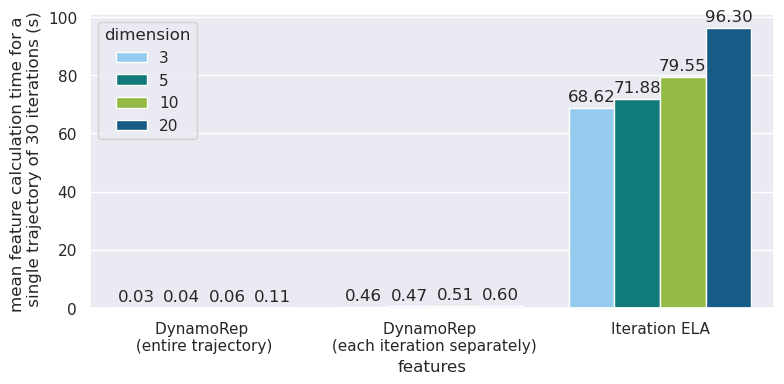

In [131]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.set(font_scale=1)
# add the plot
plots=sns.barplot(all_times, y='mean feature calculation time for single trajectory (s)', hue='dimension', x='features', palette=color_palette)

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel('mean feature calculation time for a \n single trajectory of 30 iterations (s)')
plt.tight_layout()
plt.savefig('feature_visualizations/feature_calculation_time.pdf')